<a href="https://colab.research.google.com/github/abhishekdxb17/cnn_cancer_vegi/blob/main/Disease_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/archive.zip','r')
zip_ref.extractall('/content/new')
zip_ref.close()


The ImageDataGenerator class provides a way to generate augmented image data by applying various transformations and augmentations to the input images. This can help increase the diversity of the training data and improve the model's ability to generalize to new images.

In [3]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Dropout , Activation , Flatten , Conv2D , MaxPooling2D
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
batch_size = 32
image_size = 256
channels = 3
epochs = 50

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory('/content/new/PlantVillage', shuffle = True , image_size = (image_size , image_size),
                                                              batch_size = batch_size)

Found 2152 files belonging to 3 classes.


In [6]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [8]:
dataset.take(1)  # it is selecting 1 batch which contains 32 elements

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [9]:
for element in dataset.take(1) :
  print(element)

(<tf.Tensor: shape=(32, 256, 256, 3), dtype=float32, numpy=
array([[[[151., 141., 150.],
         [151., 141., 150.],
         [151., 141., 150.],
         ...,
         [143., 131., 141.],
         [130., 118., 128.],
         [150., 138., 148.]],

        [[156., 146., 155.],
         [154., 144., 153.],
         [158., 148., 157.],
         ...,
         [149., 137., 147.],
         [138., 126., 136.],
         [156., 144., 154.]],

        [[159., 149., 158.],
         [152., 142., 151.],
         [161., 151., 160.],
         ...,
         [143., 131., 141.],
         [134., 122., 132.],
         [147., 135., 145.]],

        ...,

        [[156., 144., 154.],
         [155., 143., 153.],
         [154., 142., 152.],
         ...,
         [145., 131., 144.],
         [145., 131., 144.],
         [146., 132., 145.]],

        [[155., 143., 153.],
         [155., 143., 153.],
         [154., 142., 152.],
         ...,
         [145., 131., 144.],
         [145., 131., 144.],
       

In [10]:
for image_batch , labels_batch in dataset.take(1):
  print(image_batch.shape)
  print(labels_batch)

(32, 256, 256, 3)
tf.Tensor([0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 2 0 1 0 1 0 0 0 2 2 0 0 1 0], shape=(32,), dtype=int32)


In [11]:
for image_batch , labels_batch in dataset.take(1):
  print(image_batch.shape)
  print(labels_batch.numpy())

(32, 256, 256, 3)
[1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 0 1 1 2 1 1 0 0 1 0 0 0]


tf.Tensor(
[[[[166. 156. 164.]
   [156. 146. 154.]
   [161. 151. 159.]
   ...
   [119. 107. 111.]
   [111.  99. 103.]
   [101.  89.  93.]]

  [[166. 156. 164.]
   [154. 144. 152.]
   [157. 147. 155.]
   ...
   [128. 116. 120.]
   [124. 112. 116.]
   [117. 105. 109.]]

  [[155. 145. 153.]
   [144. 134. 142.]
   [151. 141. 149.]
   ...
   [129. 117. 121.]
   [129. 117. 121.]
   [126. 114. 118.]]

  ...

  [[191. 181. 179.]
   [188. 178. 176.]
   [187. 177. 175.]
   ...
   [146. 128. 128.]
   [140. 122. 122.]
   [144. 126. 126.]]

  [[190. 180. 178.]
   [185. 175. 173.]
   [183. 173. 171.]
   ...
   [142. 124. 124.]
   [141. 123. 123.]
   [136. 118. 118.]]

  [[183. 173. 171.]
   [180. 170. 168.]
   [182. 172. 170.]
   ...
   [137. 119. 119.]
   [143. 125. 125.]
   [135. 117. 117.]]]


 [[[127. 121. 131.]
   [126. 120. 130.]
   [127. 121. 131.]
   ...
   [180. 178. 189.]
   [179. 177. 188.]
   [178. 176. 187.]]

  [[126. 120. 130.]
   [127. 121. 131.]
   [129. 123. 133.]
   ...
   [175. 1

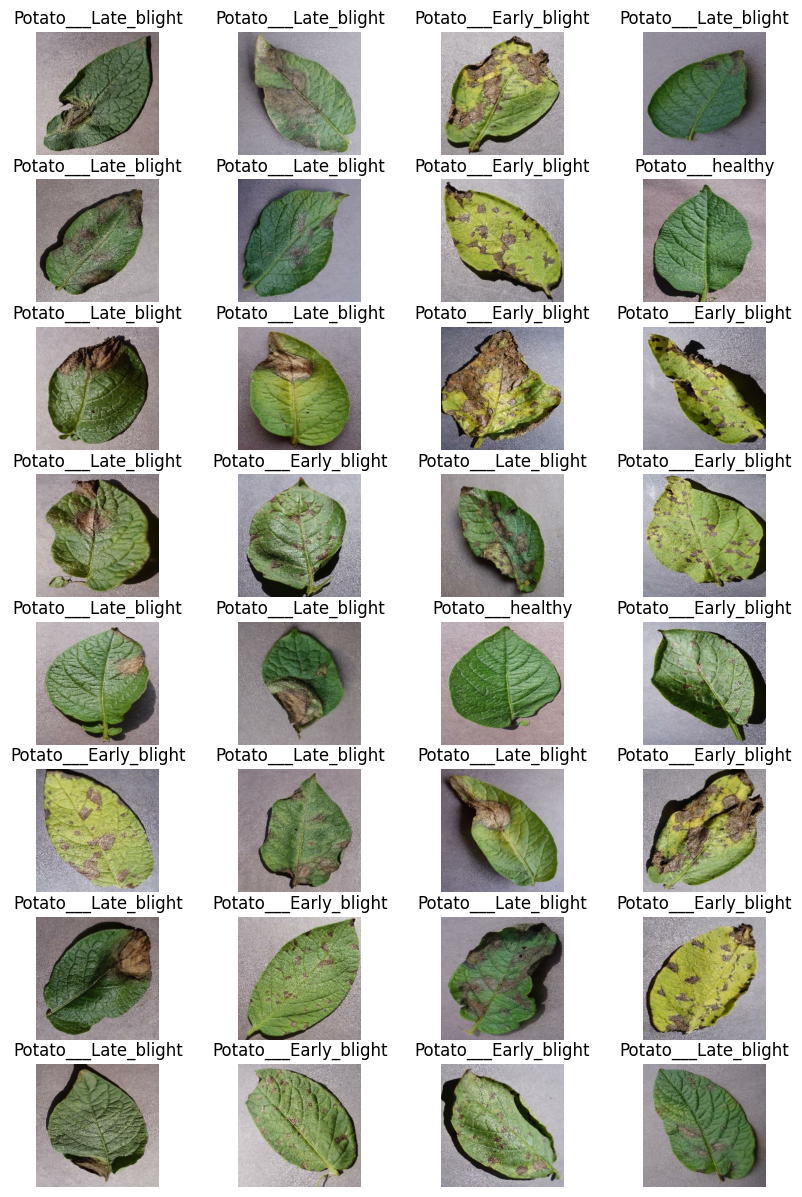

In [12]:
plt.figure(figsize=(10,15))
for image_batch , labels_batch in dataset.take(1):
  print(image_batch)
  print(labels_batch.numpy())
  for i in range(32):
    plt.subplot(8,4,i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8')) # mostly used in images to represent pixels
    plt.title(class_names[labels_batch[i]])
    plt.axis('off')

In [13]:
#total number of image is : 20638
# batch = 32
# of iterrations 20638/32 => 644.93
len(dataset)

68

In [14]:
train_size = 0.8
len(dataset) * train_size

54.400000000000006

In [15]:
# 0 to 516 includes in training data
train_ds = dataset.take(516)
len(train_ds)


68

In [16]:
test_ds = dataset.skip(516)
len(test_ds)

0

In [17]:
val_size = 0.1
len(dataset)*0.1

6.800000000000001

In [18]:
val_ds = test_ds.take(64)
len(val_ds)

0

In [19]:
test_ds = test_ds.skip(6)
len(test_ds)

0

In [20]:
def train_val_test_split(ds, train_split=0.8, test_split=0.1, val_split=0.1, shuffle=True, shuffle_size=1000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(ds_size * train_split)
    val_size = int(ds_size * val_split)
    test_size = int(ds_size * test_split)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size + val_size).take(test_size)

    return train_ds, val_ds, test_ds


In [21]:
train_ds , val_ds , test_ds = train_val_test_split(dataset)

In [22]:
print('train_ds_size:',len(train_ds))
print('val_ds_size:',len(val_ds))
print('test_ds_size',len(test_ds))

train_ds_size: 54
val_ds_size: 6
test_ds_size 6


In [23]:

# incress the perfomance
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

'''The `tf.data.Dataset.cache()` method caches the dataset in memory so that it can be accessed more quickly in the future
The `tf.data.Dataset.shuffle()` method shuffles the dataset in order to randomize the order of the data. This can be useful for training models that are sensitive to the order of the data.
The `tf.data.Dataset.prefetch()` method prefetches the next batch of data from the dataset. This can be useful for speeding up training by reducing the amount of time that the model has to wait for data.
In this case, we are using the `tf.data.Dataset.cache()` method to cache the dataset in memory, the `tf.data.Dataset.shuffle()` method to shuffle the dataset, and the `tf.data.Dataset.prefetch()` method to prefetch the next batch of data. This will help to speed up the training process.
'''

'The `tf.data.Dataset.cache()` method caches the dataset in memory so that it can be accessed more quickly in the future\nThe `tf.data.Dataset.shuffle()` method shuffles the dataset in order to randomize the order of the data. This can be useful for training models that are sensitive to the order of the data.\nThe `tf.data.Dataset.prefetch()` method prefetches the next batch of data from the dataset. This can be useful for speeding up training by reducing the amount of time that the model has to wait for data.\nIn this case, we are using the `tf.data.Dataset.cache()` method to cache the dataset in memory, the `tf.data.Dataset.shuffle()` method to shuffle the dataset, and the `tf.data.Dataset.prefetch()` method to prefetch the next batch of data. This will help to speed up the training process.\n'

In [24]:
for image_batch , label_batch in dataset.take(1):
  print(image_batch[1].shape)

(256, 256, 3)


In [25]:
image_size = 256

tf.keras.layers.experimental.preprocessing.Rescaling: This layer scales the pixel values of the input images. In this case, the scaling factor is set to 1.0/255, which divides each pixel value by 255. This operation brings the pixel values into the range [0, 1], effectively normalizing the images.

In [26]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(image_size,image_size) ,
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [27]:
data_augmentation = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
                                         tf.keras.layers.experimental.preprocessing.RandomRotation(0.3)
                                         ])

tf.keras.layers.experimental.preprocessing.RandomFlip: This layer randomly flips the input images. By specifying the argument 'horizontal_and_vertical', it randomly applies horizontal flips, vertical flips, or both to the input images. This helps increase the diversity of the training data.

tf.keras.layers.experimental.preprocessing.RandomRotation: This layer randomly applies rotation transformations to the input images. The argument 0.3 indicates the maximum angle of rotation in radians. It randomly rotates the images within the specified range, augmenting the training data with rotated versions.

By using this data_augmentation Sequential model, you can apply random flips and rotations to your input images as a form of data augmentation. Data augmentation is commonly used to improve model generalization and prevent overfitting by creating additional variations of the training data.

To use this data augmentation model, you can pass your input images through it during the training process to generate augmented versions of the images on-the-fly. This augmented data can then be used to train your neural network model, enhancing its ability to handle variations and improving its performance.






Regenerate response

In [28]:

# data augmentation

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.3)
])

Data augmentation is commonly used to improve model generalization and prevent overfitting by creating additional variations of the training data.

In [29]:
input_shape = (batch_size,image_size,image_size,channels)
n_classes = 3

In [30]:
from keras.layers.serialization import activation
model = Sequential()
#layer1
model.add(resize_and_rescale)
#layer2
model.add(data_augmentation)
#layer3
model.add(Conv2D(32,kernel_size=(3,3),activation='relu' , input_shape = input_shape))

#layer4
model.add(MaxPooling2D(2,2))
#layer5
model.add(Conv2D(64,kernel_size=(3,3), activation = 'relu'))

#layer6
model.add(MaxPooling2D(2,2))
#layer7
model.add(Conv2D(64,kernel_size=(3,3), activation = 'relu'))

#layer8
model.add(MaxPooling2D(2,2))
#layer9
model.add(Conv2D(64,kernel_size=(3,3), activation = 'relu'))

#layer10
model.add(MaxPooling2D(2,2))
#layer11
model.add(Conv2D(64,kernel_size=(3,3), activation = 'relu'))

#layer12
model.add(MaxPooling2D(2,2))
#layer13
model.add(Conv2D(64,kernel_size=(3,3), activation = 'relu'))

#layer14
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(64,activation='relu'))

model.add(Dense(n_classes , activation='softmax'))

In [31]:
model.build(input_shape = input_shape)


In [32]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_2 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [33]:
model.compile(
    optimizer ='adam' ,
    loss =tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False): The loss function is used to measure how well the model is performing during training. SparseCategoricalCrossentropy is a loss function suitable for multi-class classification problems with integer labels. The from_logits=False argument indicates that the model's output has already been passed through a softmax activation function.

If from_logits=True were used instead, it would imply that the model's output values are in their raw, unnormalized form (logits) before the softmax activation. In this case, the loss function would internally apply the softmax activation to the logits before calculating the loss.

In [34]:
result = model.fit(
    train_ds,
    batch_size = 32 ,
    validation_data = val_ds,
    verbose = 1 ,
    epochs = 50
)

#verbose: This parameter controls the verbosity of the training process.
# A value of 1 (in your code) indicates that progress updates will be displayed during training,
#showing the training loss and accuracy for each epoch.

Epoch 1/50
54/54 [==============================] - 22s 115ms/step - loss: 0.9004 - accuracy: 0.4855 - val_loss: 0.8402 - val_accuracy: 0.4688
Epoch 2/50
54/54 [==============================] - 3s 63ms/step - loss: 0.7464 - accuracy: 0.6406 - val_loss: 0.7830 - val_accuracy: 0.6406
Epoch 3/50
54/54 [==============================] - 3s 61ms/step - loss: 0.6013 - accuracy: 0.7378 - val_loss: 0.5240 - val_accuracy: 0.7865
Epoch 4/50
54/54 [==============================] - 3s 61ms/step - loss: 0.4105 - accuracy: 0.8339 - val_loss: 0.3932 - val_accuracy: 0.8177
Epoch 5/50
54/54 [==============================] - 3s 63ms/step - loss: 0.4215 - accuracy: 0.8223 - val_loss: 0.4273 - val_accuracy: 0.8073
Epoch 6/50
54/54 [==============================] - 3s 62ms/step - loss: 0.3104 - accuracy: 0.8802 - val_loss: 0.3725 - val_accuracy: 0.8906
Epoch 7/50
54/54 [==============================] - 3s 61ms/step - loss: 0.2551 - accuracy: 0.8987 - val_loss: 0.1509 - val_accuracy: 0.9427
Epoch 8/50


In [35]:
score = model.evaluate(test_ds)
score

6/6 [==============================] - 3s 30ms/step - loss: 0.0222 - accuracy: 0.9948


[0.022240594029426575, 0.9947916865348816]

In [36]:
result

In [37]:
result.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [38]:
result.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [39]:
print(result.history['accuracy'] ,'\n', result.history['val_accuracy'] ,'\n', result.history['loss'] ,'\n', result.history['val_loss'])


[0.48553240299224854, 0.640625, 0.7378472089767456, 0.8339120149612427, 0.8223379850387573, 0.8802083134651184, 0.8987268805503845, 0.9131944179534912, 0.9473379850387573, 0.9409722089767456, 0.9456018805503845, 0.9537037014961243, 0.9641203880310059, 0.9652777910232544, 0.9670138955116272, 0.9629629850387573, 0.9745370149612427, 0.9762731194496155, 0.9780092835426331, 0.9560185074806213, 0.9722222089767456, 0.9809027910232544, 0.9745370149612427, 0.9924768805503845, 0.9704861044883728, 0.9907407164573669, 0.9936342835426331, 0.9959490895271301, 0.9866898059844971, 0.9814814925193787, 0.9942129850387573, 0.9890046119689941, 0.9855324029922485, 0.9884259104728699, 0.9953703880310059, 0.9890046119689941, 0.9861111044883728, 0.9901620149612427, 0.9930555820465088, 0.9936342835426331, 0.9866898059844971, 0.9971064925193787, 0.9953703880310059, 0.9982638955116272, 0.9930555820465088, 0.9855324029922485, 0.9780092835426331, 0.9913194179534912, 0.9971064925193787, 0.9971064925193787] 
 [0.468

In [40]:
accuracy = result.history['accuracy']
val_accuracy = result.history['val_accuracy']

loss = result.history['loss']
val_loss = result.history['val_loss']

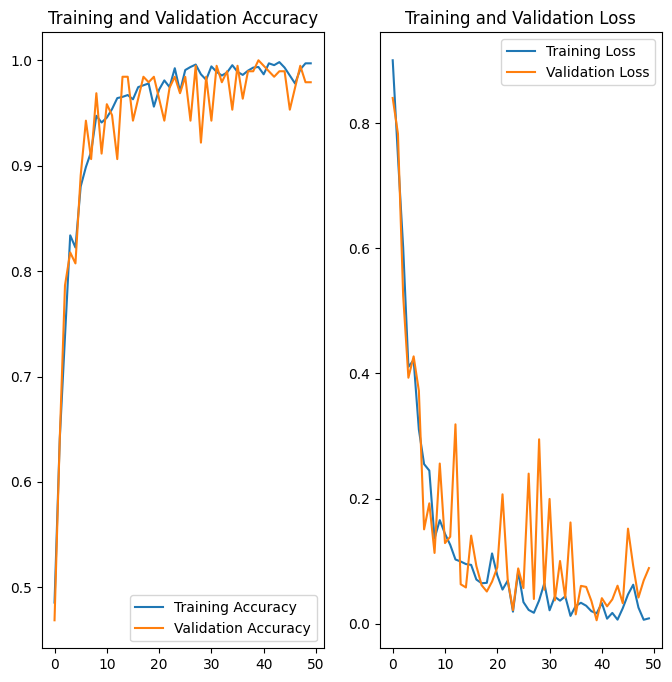

In [41]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), accuracy, label='Training Accuracy')
plt.plot(range(epochs), val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [42]:

for image_batch , label_batch in test_ds.take(1):
  print(image_batch[0])
  print('\n')
  print(label_batch[0])

tf.Tensor(
[[[143. 137. 151.]
  [144. 138. 152.]
  [146. 140. 154.]
  ...
  [142. 136. 150.]
  [142. 136. 150.]
  [132. 126. 140.]]

 [[146. 140. 154.]
  [147. 141. 155.]
  [148. 142. 156.]
  ...
  [136. 130. 144.]
  [139. 133. 147.]
  [137. 131. 145.]]

 [[149. 143. 157.]
  [150. 144. 158.]
  [151. 145. 159.]
  ...
  [126. 120. 134.]
  [132. 126. 140.]
  [138. 132. 146.]]

 ...

 [[144. 138. 152.]
  [141. 135. 149.]
  [136. 130. 144.]
  ...
  [109. 104. 124.]
  [107. 102. 122.]
  [103.  98. 118.]]

 [[143. 137. 151.]
  [140. 134. 148.]
  [137. 131. 145.]
  ...
  [109. 104. 124.]
  [109. 104. 124.]
  [105. 100. 120.]]

 [[143. 137. 151.]
  [142. 136. 150.]
  [140. 134. 148.]
  ...
  [109. 104. 124.]
  [109. 104. 124.]
  [105. 100. 120.]]], shape=(256, 256, 3), dtype=float32)


tf.Tensor(1, shape=(), dtype=int32)


this is first image
actual label Potato___Late_blight
1/1 [==============================] - 0s 79ms/step
[1.3405594e-07 9.9977082e-01 2.2902795e-04]
predicted label : Potato___Late_blight


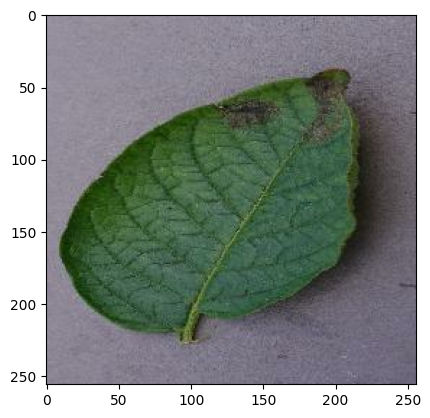

In [53]:
import numpy as np
for image_label , batch_label in test_ds.take(1):
  first_image = image_label[0].numpy().astype('uint8')
  first_label = batch_label[0].numpy()

  print('this is first image')
  plt.imshow(first_image)
  print('actual label', class_names[first_label])
  batch_predictions = model.predict(image_label)
  print(batch_predictions[0])
  print('predicted label :' , class_names[np.argmax([batch_predictions[0]])])




In [92]:
# function
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    print(img_array.shape)
    img_array = tf.expand_dims(img_array, 0) #at 0 th axis

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy()): This line converts the input image (img) to a NumPy array. It assumes that images is a TensorFlow dataset, and i represents the index of the specific image to be processed.

img_array = tf.expand_dims(img_array, 0): This line adds an extra dimension to the image array using tf.expand_dims(). It is done to match the input shape expected by the model. The additional dimension represents the batch size, which is set to 1 in this case.

(256, 256, 3)
1/1 [==============================] - 0s 36ms/step
(256, 256, 3)
1/1 [==============================] - 0s 42ms/step
(256, 256, 3)
1/1 [==============================] - 0s 32ms/step
(256, 256, 3)
1/1 [==============================] - 0s 40ms/step
(256, 256, 3)
1/1 [==============================] - 0s 49ms/step
(256, 256, 3)
1/1 [==============================] - 0s 28ms/step
(256, 256, 3)
1/1 [==============================] - 0s 45ms/step
(256, 256, 3)
1/1 [==============================] - 0s 36ms/step
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step


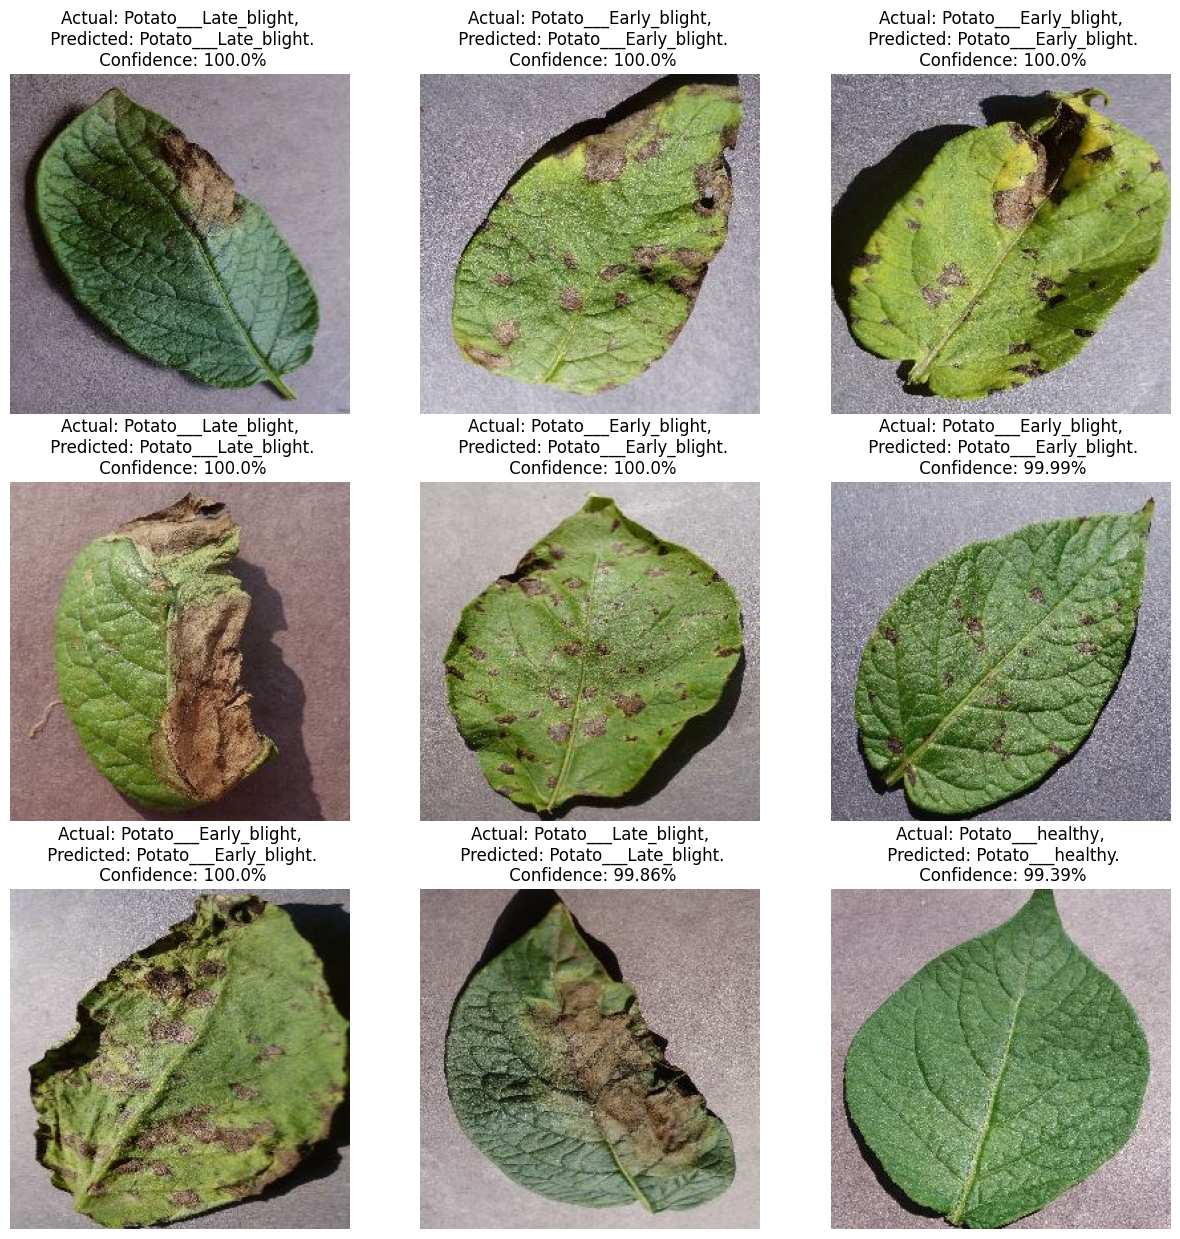

In [93]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

In [72]:
# save the model
import os
model.save('/content/drive/MyDrive/CNNPotatoModel')
